# Data Cleaning And Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [2]:
# Import the dataset
raw_data = pd.read_csv('heart.csv')
# Load the dataset
raw_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Check the dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
# Check for duplicates
raw_data.duplicated().sum()

0

In [5]:
# Changing the values in the columns
# Replace 0 with 'No' and 1 with 'Yes'
raw_data['HeartDisease'] = raw_data['HeartDisease'].replace({0: 'No', 1: 'Yes'})
raw_data['FastingBS'] = raw_data['FastingBS'].replace({0: 'No', 1: 'Yes'})

## Numerical Data Exploratory Data Analysis

In [6]:
# Check Data Summary For Numerical data
raw_data.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


To understand the data distribution, the distribution of the numerical data must be plotted

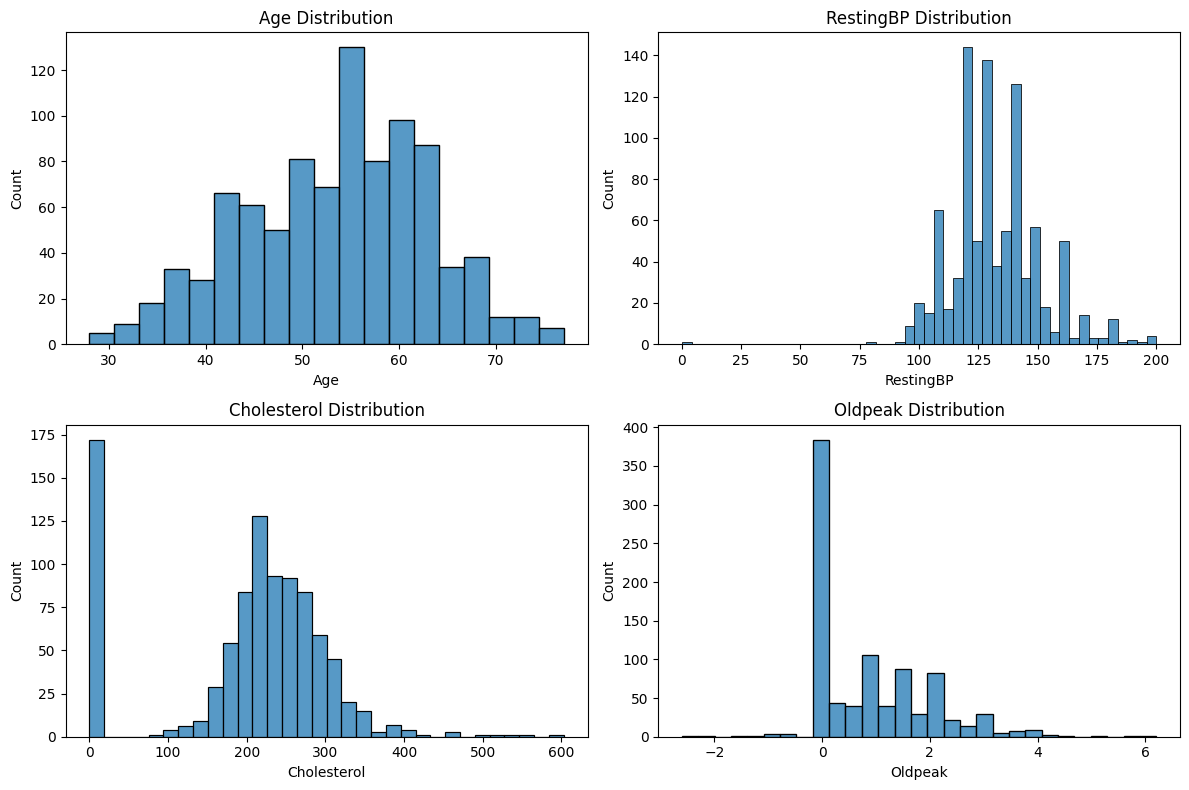

In [7]:
# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot each data on its subplot
sns.histplot(x='Age', data=raw_data, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')

sns.histplot(x='RestingBP', data=raw_data, ax=axs[0, 1])
axs[0, 1].set_title('RestingBP Distribution')

sns.histplot(x='Cholesterol', data=raw_data, ax=axs[1, 0])
axs[1, 0].set_title('Cholesterol Distribution')

sns.histplot(x='Oldpeak', data=raw_data, ax=axs[1, 1])
axs[1, 1].set_title('Oldpeak Distribution')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

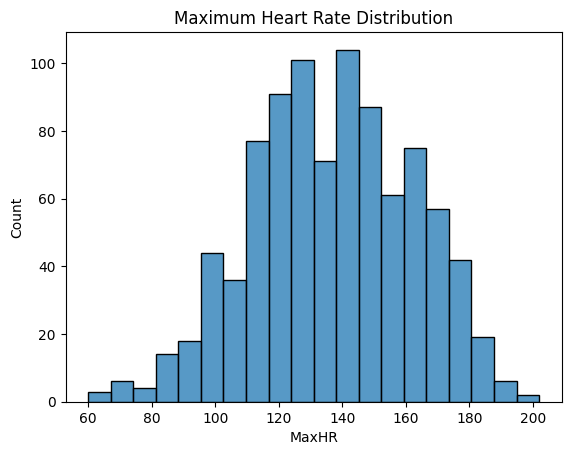

In [8]:
# Plot distribution of MaxHR
sns.histplot(x='MaxHR', data=raw_data)
# Title the Plot
plt.title('Maximum Heart Rate Distribution')
# Show the plot
plt.show()

In [9]:
# Remove the RestingBP of 0
data1 = raw_data[raw_data['RestingBP'] !=0]
data1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,No,Normal,172,N,0.0,Up,No
1,49,F,NAP,160,180,No,Normal,156,N,1.0,Flat,Yes
2,37,M,ATA,130,283,No,ST,98,N,0.0,Up,No
3,48,F,ASY,138,214,No,Normal,108,Y,1.5,Flat,Yes
4,54,M,NAP,150,195,No,Normal,122,N,0.0,Up,No


In [10]:
# Remove the  Cholesterol of 0
data2 = raw_data[raw_data['Cholesterol'] !=0]
data2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,No,Normal,172,N,0.0,Up,No
1,49,F,NAP,160,180,No,Normal,156,N,1.0,Flat,Yes
2,37,M,ATA,130,283,No,ST,98,N,0.0,Up,No
3,48,F,ASY,138,214,No,Normal,108,Y,1.5,Flat,Yes
4,54,M,NAP,150,195,No,Normal,122,N,0.0,Up,No


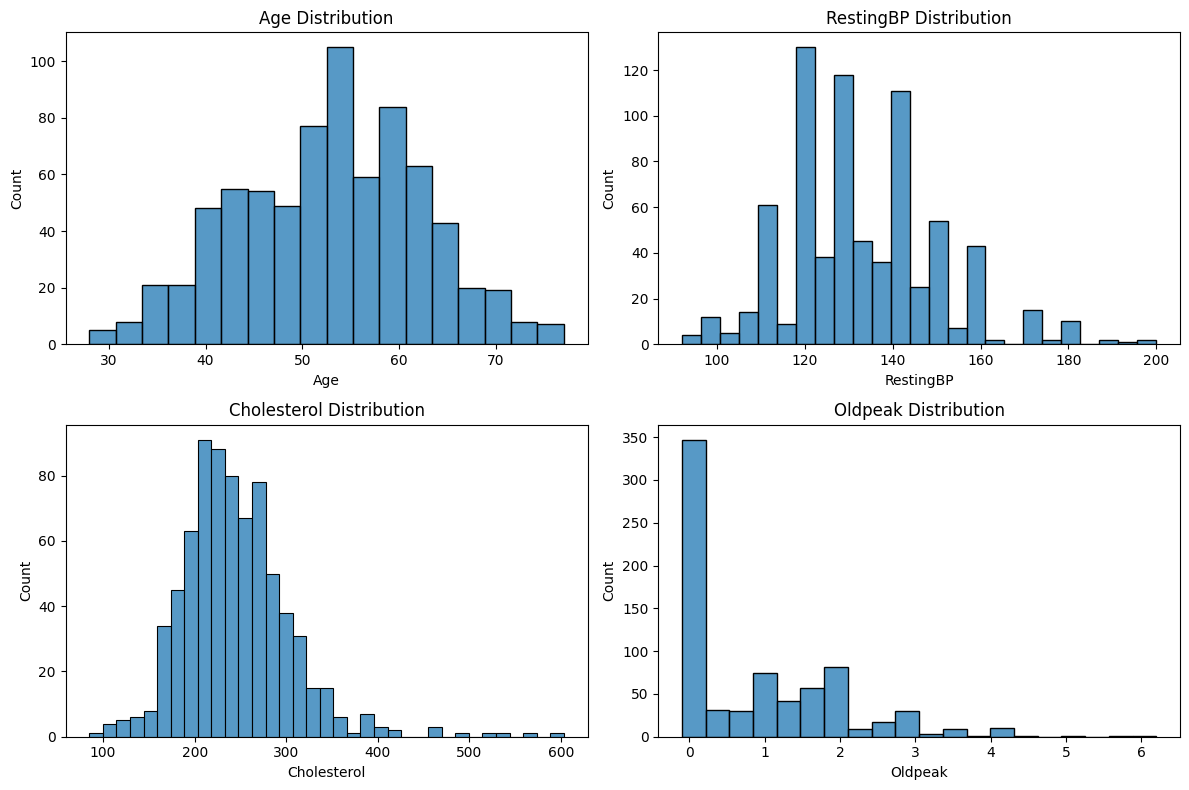

In [11]:
# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot each data on its subplot
sns.histplot(x='Age', data=data2, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')

sns.histplot(x='RestingBP', data=data2, ax=axs[0, 1])
axs[0, 1].set_title('RestingBP Distribution')

sns.histplot(x='Cholesterol', data=data2, ax=axs[1, 0])
axs[1, 0].set_title('Cholesterol Distribution')

sns.histplot(x='Oldpeak', data=data2, ax=axs[1, 1])
axs[1, 1].set_title('Oldpeak Distribution')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

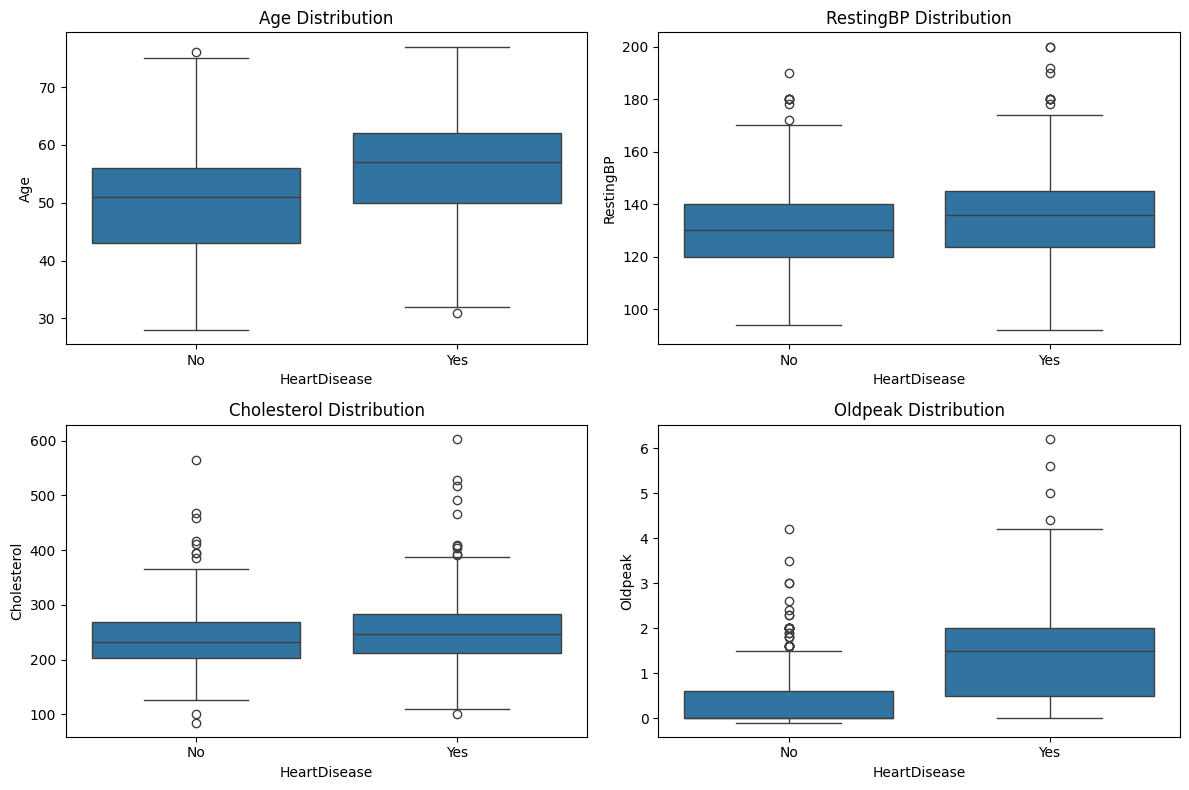

In [12]:
# Checking how numerical data is distributed by HeartDisease
# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot each data on its subplot
sns.boxplot(y='Age', x='HeartDisease', data=data2, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')

sns.boxplot(y='RestingBP', x='HeartDisease', data=data2, ax=axs[0, 1])
axs[0, 1].set_title('RestingBP Distribution')

sns.boxplot(y='Cholesterol', x='HeartDisease', data=data2, ax=axs[1, 0])
axs[1, 0].set_title('Cholesterol Distribution')

sns.boxplot(y='Oldpeak', x='HeartDisease', data=data2, ax=axs[1, 1])
axs[1, 1].set_title('Oldpeak Distribution')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

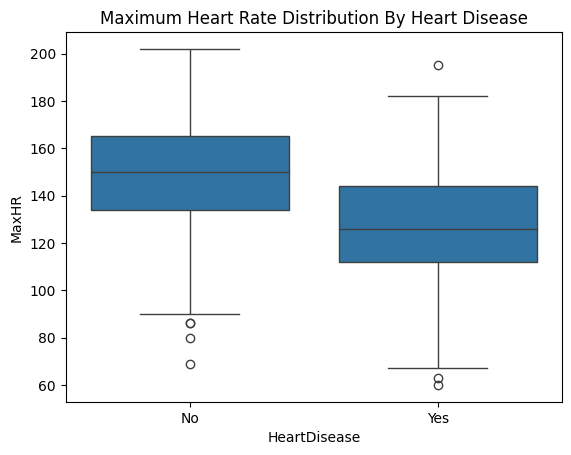

In [13]:
# Plot distribution of MaxHR By Heart Disease
sns.boxplot(y='MaxHR', x='HeartDisease',data=raw_data)
# Title the Plot
plt.title('Maximum Heart Rate Distribution By Heart Disease')
# Show the plot
plt.show()

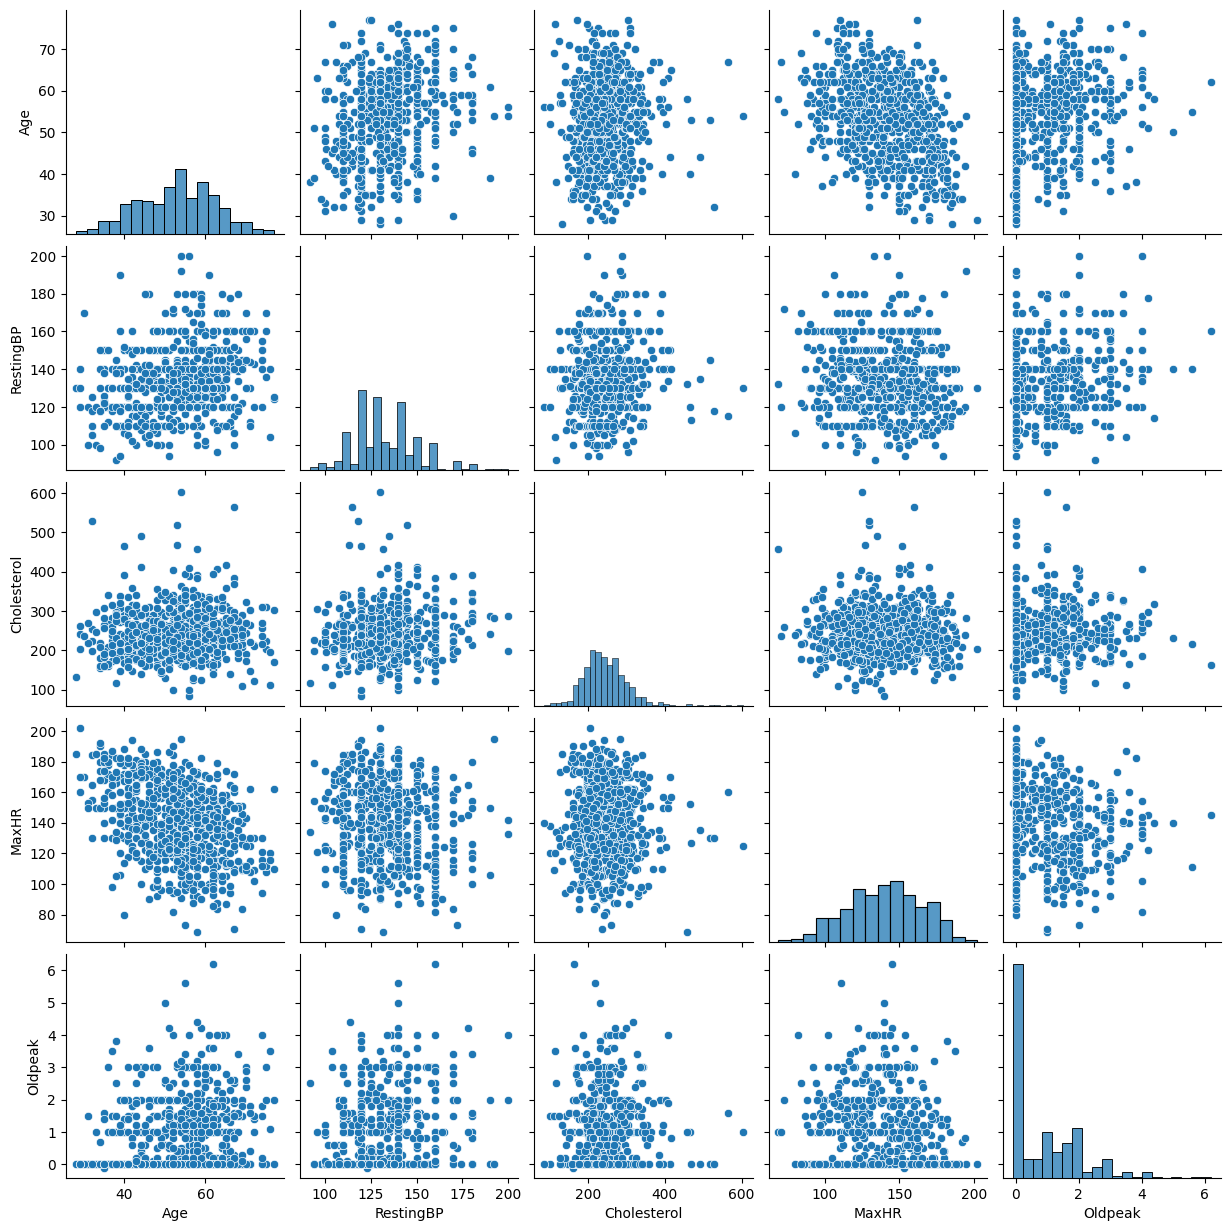

In [20]:
# Get a General overview of the numerical data
sns.pairplot(data2)
plt.show()

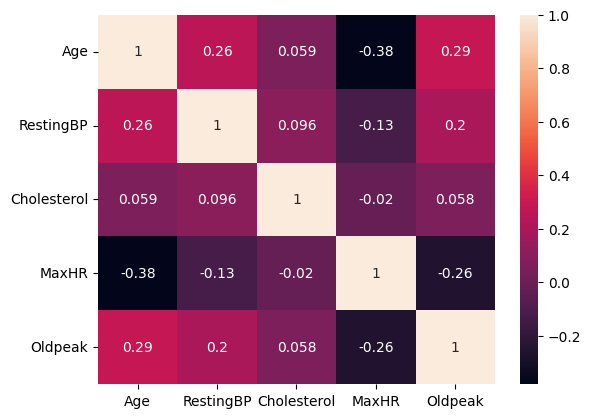

In [15]:
# Plot the Correlation plot
sns.heatmap(data2.select_dtypes(exclude='object').corr(), annot=True)
plt.show()

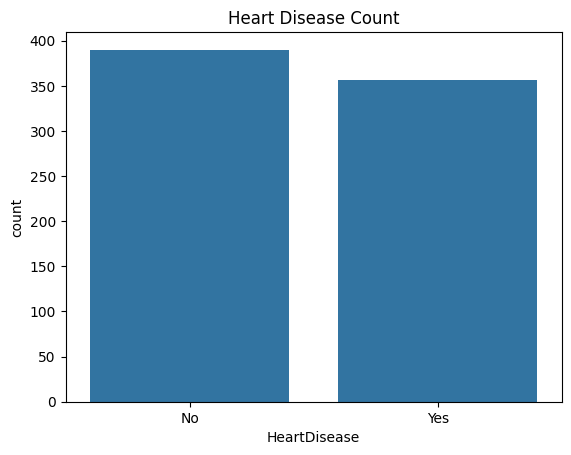

In [16]:
# Plot the HeartDisease Count plot
sns.countplot(x='HeartDisease', data=data2)
# Title the Plot
plt.title('Heart Disease Count')
plt.show()

### Categorical Data Exploratory Data Analysis

In [17]:
# Check the summary statistics of Categorical data
data2.describe(include='object')

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
count,746,746,746,746,746,746,746
unique,2,4,2,3,2,3,2
top,M,ASY,No,Normal,N,Flat,No
freq,564,370,621,445,459,354,390


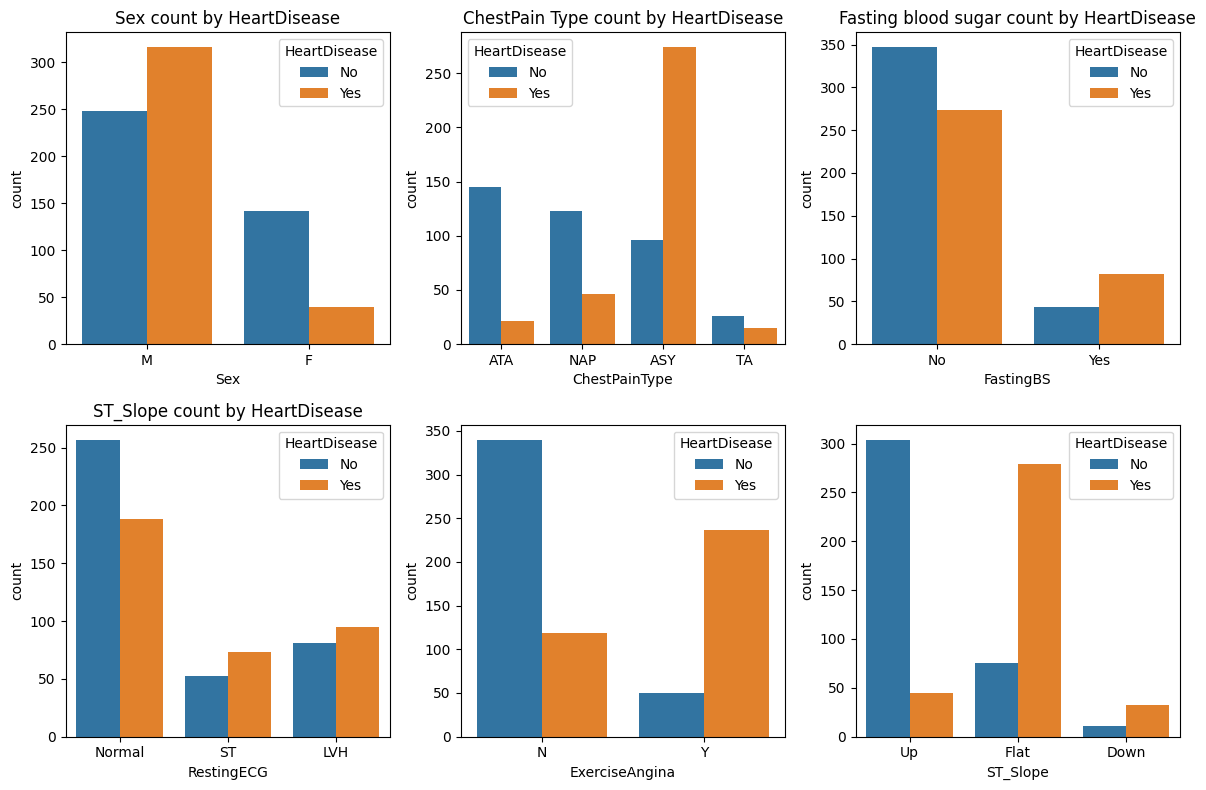

In [18]:
# Checking how numerical data is distributed by HeartDisease
# Create a figure and subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot each data on its subplot
sns.countplot(x='Sex', hue='HeartDisease', data=data2, ax=axs[0, 0])
axs[0, 0].set_title('Sex count by HeartDisease')

sns.countplot(x='ChestPainType', hue='HeartDisease', data=data2, ax=axs[0, 1])
axs[0, 1].set_title('ChestPain Type count by HeartDisease')

sns.countplot(x='FastingBS', hue='HeartDisease', data=data2, ax=axs[0, 2])
axs[0, 2].set_title('Fasting blood sugar count by HeartDisease')

sns.countplot(x='RestingECG', hue='HeartDisease', data=data2, ax=axs[1, 0])
axs[1, 0].set_title('Resting  electrocardiogram count by HeartDisease')

sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=data2, ax=axs[1, 1])
axs[1, 0].set_title('Exercise-induced angina count by HeartDisease')

sns.countplot(x='ST_Slope', hue='HeartDisease', data=data2, ax=axs[1, 2])
axs[1, 0].set_title('ST_Slope count by HeartDisease')
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
# Save the cleaned data 
data2.to_csv('cleaned_data',index=False)